밀도추정(Density Estimation): $N$개의 관찰데이터(observations) $\mathbf{x}_1,\ldots\mathbf{x}_N$가 주어졌을 때 분포함수 $p(\mathbf{x})$를 찾는 것

1. $p(\mathbf{x})$를 파라미터화된 분포로 가정한다. 회귀, 분류문제에서는 주로 $p(t|\mathbf{x})$, $p(\mathcal{C}|\mathbf{x})$를 추정한다.


2. 그 다음 분포의 파라미터를 찾는다.
  - 빈도주의 방법(Frequentist's way): 어떤 기준(예를 들어 likelihood)을 최적화시키는 과정을 통해 파라미터 값을 정한다. 파라미터의 하나의 값을 구하게 된다.
  - 베이지언 방법(Bayesian way): 먼저 파라미터의 사전확률(prior distribution)을 가정하고 Bayes' rule을 통해 파라미터의 사후확률(posterior distribution)을 구한다.


3. 파라미터를 찾았다면(한 개의 값이든 분포든) 그것을 사용해 "예측"할 수 있다($t$나 $\mathcal{C}$).


켤레사전분포(Conjugate Prior): 사후확률이 사전확률과 동일한 함수형태를 가지도록 해준다.

## 이항변수(Binary Variables): 빈도주의 방법

이항 확률변수(binary random variable) $x\in \{0, 1\}$ (예를 들어 동전던지기)가 다음을 만족한다고 하자.

$$p(x=1 | \mu) = \mu, p(x=0 | \mu) = 1 - \mu$$

$p(x)$는 베르누이 분포(Bernoulli distribution)로 표현될 수 있다.

$$\mathrm{Bern}(x | \mu) = \mu^x (1-\mu)^{1-x}$$

기댓값, 분산

- $\mathbb{E}[x] = \mu$
- $\mathrm{var}[x] = \mu(1-\mu)$

우도함수 (Likelihood Function)

$x$값을 $N$번 관찰한 결과를 $\mathcal{D} = \{x_1,\ldots,x_N\}$라고 하자. 각 $x$가 독립적으로 $p(x|\mu)$에서 뽑혀진다고 가정하면 다음과 같이 우도함수($\mu$의 함수인)를 만들 수 있다.

$$p(\mathcal{D}|\mu) = \prod_{n=1}^N p(x_n|\mu) = \prod_{n=1}^N \mu^{x_n} (1-\mu)^{1-x_n}$$

**빈도주의 방법**에서는 $\mu$값을 이 우도함수를 최대화시키는 값으로 구할 수 있다. 또는 아래와 같이 로그우도함수를 최대화시킬 수도 있다.

$$\ln p(\mathcal{D}|\mu) = \sum_{n=1}^N \ln p(x_n|\mu) = \sum_{n=1}^N \{x_n\ln \mu + (1-x_n)\ln(1-\mu)\}$$

$\mu$의 최대우도 추정치(maximum likelihood estimate)는

$$\mu^{\mathrm{ML}} = \frac{m}{N} ~~\mathrm{with}~~ m = (\#\mathrm{observations~of}~ x=1)$$

$N$이 작은 경우에 위 MLE는 과적합(overfitting)된 결과를 낳을 수 있다. $N = m = 3 \to \mu^{\mathrm{ML}} = 1$!

## 이항변수(Binary Variables): 베이지언 방법

이항분포 (Binomial Distribution)

$\mathcal{D} = \{x_1,\ldots,x_N\}$일 때, 이항변수 $x$가 1인 경우를 $m$번 관찰할 확률

$$\mathrm{Bin}(m|N,\mu) = {N \choose m}\mu^m(1-\mu)^{N-m}$$

$${N \choose m} = \frac{N!}{(N-m)!m!}$$

- $\mathbb{E}[m] = \sum_{m=0}^N m\mathrm{Bin}(m|N,\mu) = N\mu$
- $\mathrm{var}[m] = \sum_{m=0}^N (m-\mathbb{E}[m])^2\mathrm{Bin}(m|N,\mu) = N\mu(1-\mu)$


데이터를 보는 관점
- 베르누이 시행의 반복: $x_1,\ldots,x_N$ 각각이 확률변수
- $x$가 1인 경우를 몇 번 관찰했는가?: 하나의 확률변수 $m$

베이지안 방법을 쓰기 위해서 데이터의 우도를 구해야 하는데 이항분포를 가정하면 우도함수가 하나의 변수 $m$으로($x_1,\ldots,x_N$ 대신) 표현가능하므로 간편해진다.

베타분포 (Beta Distribution)

베이지언 방법으로 문제를 해결하기 위해 베타분포를 켤레사전분포(conjugate prior)로 사용한다.

$$\mathrm{Beta}(\mu|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$$

감마함수 $\Gamma(x)$는 다음과 같이 정의된다.

$$\Gamma(x) = \int_0^{\infty}u^{x-1}e^{-u}\mathrm{d}u$$

감마함수는 계승(factorial)을 실수로 확장시킨다. $\Gamma(n) = (n-1)!$

#### $\Gamma(x) = (x-1)\Gamma(x-1)$임을 증명하기

Using integration by parts $\int_0^{\infty}a\mathrm{d}b = \left. ab\right\vert_0^{\infty} - \int_0^{\infty}b\mathrm{d}a$

\begin{align*}
a &= u^{x-1} &\mathrm{d}b &= -e^{-u}\mathrm{d}u\\
b &= e^{-u} &\mathrm{d}a &= (x-1)u^{x-2}\mathrm{d}u\\
\Gamma(x) &= \left. u^{x-1}(-e^{-u})\right\vert_0^{\infty} + \int_0^{\infty} (x-1)u^{x-2}e^{-u}\mathrm{d}u\\
&= 0 + (x-1)\Gamma(x-1)
\end{align*}

베타분포가 normalized임을 증명하기 ($\int_0^{1}\mathrm{Beta}(\mu|a,b)\mathrm{d}\mu = 1$)

$\int_0^1 \mu^{a-1}(1-\mu)^{b-1}\mathrm{d}\mu = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$임을 증명하면 된다.

\begin{align*}
\Gamma(a)\Gamma(b) &= \int_0^{\infty} x^{a-1}e^{-x}\mathrm{d}x\int_0^{\infty} y^{b-1}e^{-y}\mathrm{d}y\\
&= \int_0^{\infty}\int_0^{\infty}e^{-x-y}x^{a-1}y^{b-1}\mathrm{d}y\mathrm{d}x\\
&= \int_0^{\infty}\int_0^{\infty}e^{-t}x^{a-1}(t-x)^{b-1}\mathrm{d}t\mathrm{d}x &\mathrm{by}~ t=y+x, \mathrm{d}t = \mathrm{d}y\\
&= \int_0^{\infty}\int_0^{\infty}e^{-t}x^{a-1}(t-x)^{b-1}\mathrm{d}x\mathrm{d}t\\
&= \int_0^{\infty}e^{-t}\int_0^{\infty}x^{a-1}(t-x)^{b-1}\mathrm{d}x\mathrm{d}t\\
&= \int_0^{\infty}e^{-t}\int_0^1(t\mu)^{a-1}(t-t\mu)^{b-1}t\mathrm{d}\mu\mathrm{d}t &\mathrm{by}~ x=t\mu, \mathrm{d}x = t\mathrm{d}\mu\\
&= \int_0^{\infty}e^{-t}t^{a-1}t^{b-1}t\left(\int_0^1 \mu^{a-1}(1-\mu)^{b-1}\mathrm{d}\mu\right)\mathrm{d}t\\
&= \int_0^{\infty}e^{-t}t^{a+b-1}\mathrm{d}t\int_0^1\mu^{a-1}(1-\mu)^{b-1}\mathrm{d}\mu\\
&= \Gamma(a+b)\int_0^1\mu^{a-1}(1-\mu)^{b-1}\mathrm{d}\mu
\end{align*}

따라서, $\int_0^1 \mu^{a-1}(1-\mu)^{b-1}\mathrm{d}\mu = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$이 성립한다.

기댓값, 분산

- $\mathbb{E}[\mu] = \frac{a}{a+b}$
- $\mathrm{var}[\mu] = \frac{ab}{(a+b)^2(a+b+1)}$

$\mu$의 사후확률 (posterior)

\begin{align*}
p(\mu | m, l, a, b) &= \frac{\textrm{Bin}(m|N,\mu)\textrm{Beta}(\mu|a,b)}{\int_0^1 \textrm{Bin}(m|N,\mu)\textrm{Beta}(\mu|a,b)\textrm{d}\mu}\\
&= \frac{\mu^{m+a-1}(1-\mu)^{l+b-1}}{\int_0^1 \mu^{m+b-1}(1-\mu)^{l+b-1}\textrm{d}\mu}\\
&= \frac{\mu^{m+a-1}(1-\mu)^{l+b-1}}{\Gamma(m+a)\Gamma(l+b)/\Gamma(m+a+l+b)}\\
&= \frac{\Gamma(m+a+l+b)}{\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1}
\end{align*}

예측분포 (predictive distribution)

$$p(x=1 | \mathcal{D}) = \int_0^1 p(x=1|\mu)p(\mu|\mathcal{D})\mathrm{d}\mu = \int_0^1 \mu p(\mu|\mathcal{D})\mathrm{d}\mu = \mathbb{E}[\mu|\mathcal{D}]$$

$$p(x=1 | \mathcal{D}) = \frac{m+a}{m+a+l+b}$$

## 다항변수(Multinomial Variables): 빈도주의 방법

$K$개의 상태를 가질 수 있는 확률변수를 $K$차원의 벡터 $\mathbf{x}$ (하나의 원소만 1이고 나머지는 0)로 나타낼 수 있다. 이런 $\mathbf{x}$를 위해서 베르누이 분포를 다음과 같이 일반화시킬 수 있다.

$$p(\mathbf{x}|\pmb \mu) = \prod_{k=1}^K \mu_k^{x_k}$$
with $\sum_k \mu_k = 1$

$\mathbf{x}$의 기댓값
$$\mathbb{E}[\mathbf{x}|\pmb \mu] = \sum_{\mathbf{x}} p(\mathbf{x}|\pmb \mu) = (\mu_1,\ldots,\mu_M)^T = \pmb \mu$$

우도함수

${\bf x}$값을 $N$번 관찰한 결과 $\mathcal{D} = \{{\bf x}_1,\ldots,{\bf x}_N\}$가 주어졌을 때, 우도함수는 다음과 같다.

$$p(\mathcal{D}|\pmb \mu) = \prod_{n=1}^N\prod_{k=1}^K \mu_k^{x_{nk}} = \prod_{k=1}^K \mu_k^{(\sum_n x_{nk})} = \prod_{k=1}^K \mu_k^{m_k}$$

$$m_k = \sum_n x_{nk}$$

$\mu$의 최대우도 추정치(maximum likelihood estimate)를 구하기 위해선 $\mu_k$의 합이 1이 된다는 조건하에서 $\ln p(\mathcal{D}|\pmb \mu)$을 최대화시키는 $\mu_k$를 구해야 한다. 라그랑주 승수(Lagrange multiplier) $\lambda$를 사용해서 다음을 최대화시키면 된다.

$$\sum_{k=1}^K m_k \ln \mu_k + \lambda \left(\sum_{k=1}^K \mu_k -1\right)$$

$$\mu_k^{ML} = \frac{m_k}{N}$$

## 다항변수(Multinomial Variables): 베이지언 방법

다항분포 (Multinomial distribution)

파라미터 $\pmb \mu$와 전체 관찰개수 $N$이 주어졌을 때 $m_1,\ldots,m_K$의 분포를 다항분포(multinomial distribution)이라고 하고 다음과 같은 형태를 가진다.

$$\mathrm{Mult}(m_1,\ldots,m_K|\pmb \mu,N) = {N \choose m_1m_2\ldots m_K} \prod_{k=1}^K \mu_k^{m_k}$$

$${N \choose m_1m_2\ldots m_K} = \frac{N!}{m_1!m_2!\ldots m_K!}$$

$$\sum_{k=1}^K m_k= N$$

디리클레 분포(Dirichlet distribution): 다항분포를 위한 켤레사전분포

$$\mathrm{Dir}(\pmb \mu|\mathbf{\alpha}) = \frac{\Gamma{\alpha_0}}{\Gamma(\alpha_1)\ldots\Gamma(\alpha_K)}\prod_{k=1}^K \mu_k^{\alpha_k-1}$$

$$\alpha_0 = \sum_{k=1}^K \alpha_k$$

디리클레 분포의 normalization 증명 ($K=3$)

다음 결과를 사용한다.

\begin{align*}
\int_L^U(x-L)^{a-1}(U-x)^{b-1}\mathrm{d}x &= \int_0^1 (U-L)^{a-1}t^{a-1}(U-L)^{b-1}(1-t)^{b-1}(U-L)\mathrm{d}t &\mathrm{by}~ t=\frac{x-L}{U-L}\\
&= (U-L)^{a+b-1}\int_0^1 t^{a-1}(1-t)^{b-1}\mathrm{d}t\\
&= (U-L)^{a+b-1}\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}
\end{align*}

\begin{align*}
\int_0^{1-\mu_1}\mu_1^{\alpha_1-1}\mu_2^{\alpha_2-1}(1-\mu_1-\mu_2)^{\alpha_3-1}\mathrm{d}\mu_2 &= \mu_1^{\alpha_1-1}\int_0^{1-\mu_1}\mu_2^{\alpha_2-1}(1-\mu_1-\mu_2)^{\alpha_3-1}\mathrm{d}\mu_2 & \textrm{by}~ L=0, U=1-\mu_1\\
&= \mu_1^{\alpha_1-1}(1-\mu_1)^{\alpha_2+\alpha_3-1}\frac{\Gamma(\alpha_2)\Gamma(\alpha_3)}{\Gamma(\alpha_2+\alpha_3)}
\end{align*}

\begin{align*}
\int_0^1\int_0^{1-\mu_1}\mu_1^{\alpha_1-1}\mu_2^{\alpha_2-1}(1-\mu_1-\mu_2)^{\alpha_3-1}\mathrm{d}\mu_2\mathrm{d}\mu_1 &= \frac{\Gamma(\alpha_2)\Gamma(\alpha_3)}{\Gamma(\alpha_2+\alpha_3)} \int_0^1 \mu_1^{\alpha_1-1}(1-\mu_1)^{\alpha_2+\alpha_3-1}\mathrm{d}\mu_1\\
&= \frac{\Gamma(\alpha_2)\Gamma(\alpha_3)}{\Gamma(\alpha_2+\alpha_3)} \frac{\Gamma(\alpha_1)\Gamma(\alpha_2+\alpha_3)}{\Gamma(\alpha_1+\alpha_2+\alpha_3)}\\
&= \frac{\Gamma(\alpha_1)\Gamma(\alpha_2)\Gamma(\alpha_3)}{\Gamma(\alpha_1+\alpha_2+\alpha_3)}
\end{align*}

$\mu$의 사후확률 (posterior)

\begin{align*}
p(\pmb \mu|\mathcal{D},\mathbf{\alpha}) &= \mathrm{Dir}(\pmb \mu|\mathbf{\alpha}+\mathbf{m})\\
&= \frac{\Gamma(\alpha_0+N)}{\Gamma(\alpha_1+m_1)\ldots\Gamma(\alpha_K+m_K)}\prod_{k=1}^K \mu_k^{\alpha_k+m_k-1}
\end{align*}

$$\mathbf{m} = (m_1,\ldots,m_K)^T$$

$\alpha_k$를 $x_k=1$에 대한 사전관찰 개수라고 생각할 수 있다.

In [1]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [2]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})
import numpy as np

## Uniform Distribution

In [3]:
# import uniform distribution
from scipy.stats import uniform

In [4]:
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

In [5]:
data_uniform

array([22.34551139, 26.97976036, 20.88323552, ..., 13.37398478,
       13.54082412, 26.35304483])

c:\users\함석현\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

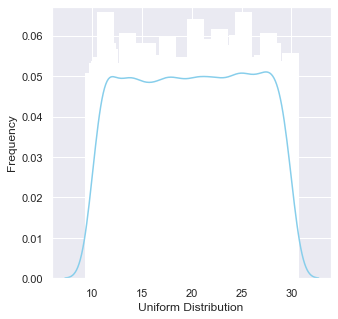

In [6]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## Bernoulli Distribution

In [7]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.8)

In [8]:
np.unique(data_bern, return_counts=True)

(array([0, 1]), array([2010, 7990], dtype=int64))

c:\users\함석현\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

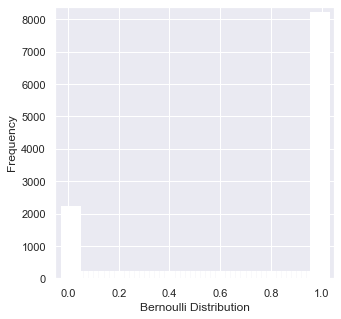

In [9]:
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

## Beta Distribution

In [10]:
from scipy.stats import beta
a, b = 0.1, 0.1
data_beta = beta.rvs(a, b, size=10000)

In [11]:
data_beta

array([3.92217437e-02, 4.07154121e-01, 9.99897499e-01, ...,
       9.99999968e-01, 9.71570827e-01, 1.73823571e-04])

[Text(0.5, 0, 'Beta Distribution'), Text(0, 0.5, 'Frequency')]

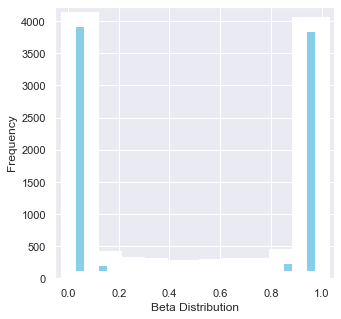

In [12]:
ax= sns.distplot(data_beta,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Beta Distribution', ylabel='Frequency')

## Multinomial Distribution

In [13]:
from scipy.stats import multinomial
data_multinomial = multinomial.rvs(n=1, p=[0.2, 0.1, 0.3, 0.4], size=10000)

In [14]:
data_multinomial[:50]

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0,

In [15]:
for i in range(4):
  print(np.unique(data_multinomial[:,i], return_counts=True))

(array([0, 1]), array([8054, 1946], dtype=int64))
(array([0, 1]), array([8973, 1027], dtype=int64))
(array([0, 1]), array([7018, 2982], dtype=int64))
(array([0, 1]), array([5955, 4045], dtype=int64))
